In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator
import pandas as pd
import datetime as dt


from sklearn.linear_model import LinearRegression

from scipy.stats import linregress

## Annual Temperature Anomaly (warming rate)

From https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/download.html

Decadal variations in surface temperature are inevitably obfuscated by internal variability. The ENSO events have significant influences on the decadal temperature anomalies, with the El Nino event in 2016 raising the annual mean SST by 0.16℃ and the subsequent La Nina event lowering the SST by 0.09℃ in 2021 (Samset et al., 2023).


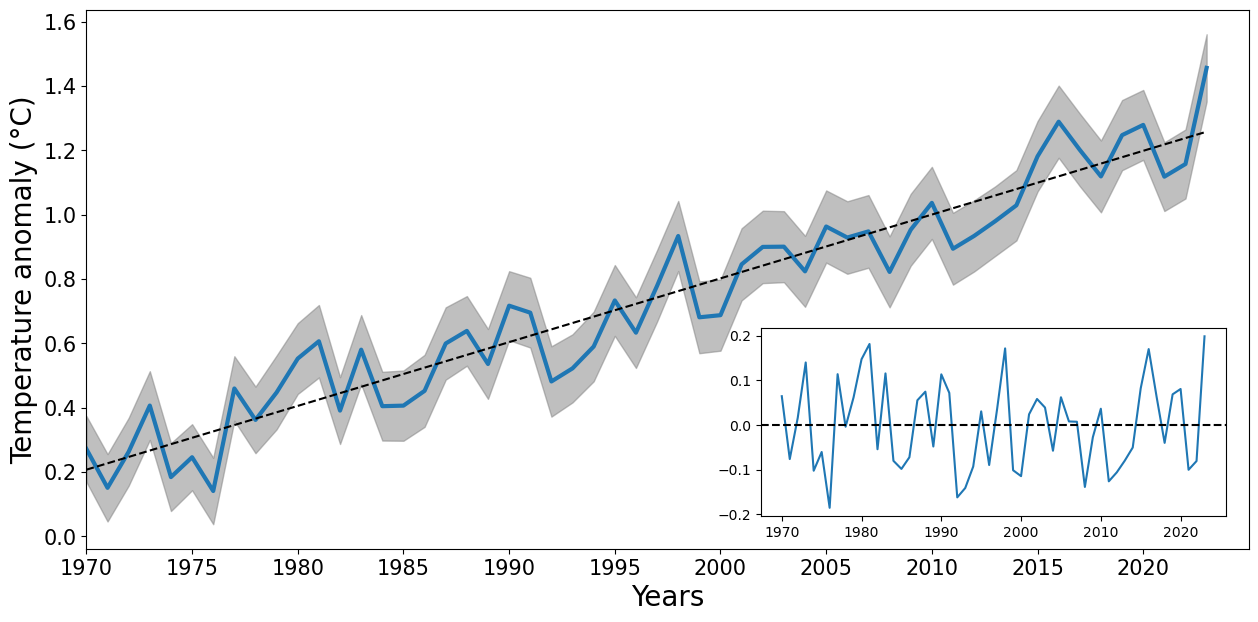

R-square: 0.9097050911741809
Slope: [0.01983648]
Temperature deviation from warming trend (2023):  0.1984785359076089
2023 Temperature:  1.4568074408235294
2023 Temperature upper:  1.3521305913921569
2023 Temperature lower:  1.5614842896078431


In [2]:
# HadCRUST5
# 1990-1850=140+1=141
temp = pd.read_csv('HadCRUT.5.0.2.0.analysis.summary_series.global.annual.csv')
temp_base = temp[(temp['Time']>=1850) & (temp['Time']<=1900)]

temp['adjusted anomaly'] = temp['Anomaly (deg C)'] - temp_base['Anomaly (deg C)'].mean()
temp['adjusted Lower'] = temp['Lower confidence limit (2.5%)'] - temp_base['Lower confidence limit (2.5%)'].mean()
temp['adjusted Upper'] = temp['Upper confidence limit (97.5%)'] - temp_base['Upper confidence limit (97.5%)'].mean()


temp_yr_1970 = temp[(temp['Time']>=1970) & (temp['Time']<=2023)]

# plot temperature anomaly
fig, ax1 = plt.subplots(figsize=(15,7))
ax1.plot(temp_yr_1970['Time'],temp_yr_1970['adjusted anomaly'],linewidth=3)

# adding the 2.5% and 97.5% confidential limites
ax1.fill_between(temp_yr_1970['Time'],
                temp_yr_1970['adjusted Lower'],
                temp_yr_1970['adjusted Upper'],
                color='grey', alpha=0.5)

# plot the best-fit line with regression from 1970
x = temp_yr_1970['Time'].values.reshape(-1,1)#reshape for sklearn
model = LinearRegression().fit(x,temp_yr_1970['adjusted anomaly'])
prediction = model.predict(x)
ax1.plot(temp_yr_1970['Time'],prediction,'--',color='k')

plt.xlabel('Years',fontsize=20)
plt.xticks(np.arange(1970,2025,5),fontsize=15)
plt.ylabel('Temperature anomaly (\N{DEGREE SIGN}C)',fontsize=20)
plt.yticks(fontsize=15)
plt.xlim(1970,2025)


# create embedded axes (inset) into the parent axes
ax2 = ax1.inset_axes([.58, .06, .4, .35]) #[x, y, width, height]
ax2.plot(temp_yr_1970['Time'],
         temp_yr_1970['adjusted anomaly']- prediction)
ax2.axhline(color='k',linestyle='--')


plt.show()

# the cofficient of determination R^2 (amount of variation in y can be explained by the dependence on x)
r_sq = model.score(x, temp_yr_1970['adjusted anomaly'])
print(f"R-square: {r_sq}")

# the coefficent 
print(f'Slope: {model.coef_}')


print('Temperature deviation from warming trend (2023): ',temp_yr_1970['adjusted anomaly'].iloc[-1]-prediction[-1])
print('2023 Temperature: ',temp_yr_1970['adjusted anomaly'].iloc[-1])
print('2023 Temperature upper: ',temp_yr_1970['adjusted Upper'].iloc[-1])
print('2023 Temperature lower: ',temp_yr_1970['adjusted Lower'].iloc[-1])




In [3]:
x = temp_yr_1970['Time'].values.reshape(-1,1)#reshape for sklearn
model = LinearRegression().fit(x,temp_yr_1970['adjusted Upper'])
prediction = model.predict(x)
print(f'Slope: {model.coef_}')

Slope: [0.01974196]


In [4]:
x = temp_yr_1970['Time'].values.reshape(-1,1)#reshape for sklearn
model = LinearRegression().fit(x,temp_yr_1970['adjusted Lower'])
prediction = model.predict(x)
print(f'Slope: {model.coef_}')

Slope: [0.019931]


In [5]:
temp_yr_1970['predictions']=prediction
temp_yr_1970['deviations']=temp_yr_1970['adjusted anomaly']-temp_yr_1970['predictions']

/var/folders/nd/w0dzw_sd0n5cj7_w8schd1yc0000gn/T/ipykernel_38721/1361734925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_yr_1970['predictions']=prediction
/var/folders/nd/w0dzw_sd0n5cj7_w8schd1yc0000gn/T/ipykernel_38721/1361734925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_yr_1970['deviations']=temp_yr_1970['adjusted anomaly']-temp_yr_1970['predictions']


R-square: 0.24369338988777578
Slope: [0.01931427]


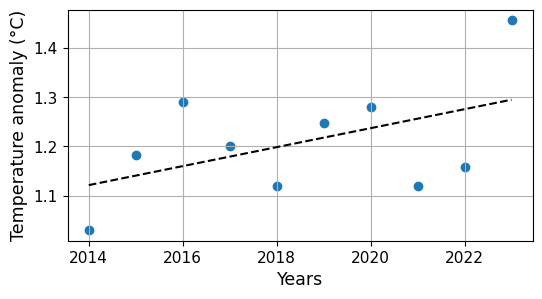

In [6]:
# 2014-2023
temp_2014 = temp[(temp['Time'] >= 2014)&(temp['Time']<=2023)]


plt.figure(figsize=(6,3))
plt.scatter(temp_2014['Time'],temp_2014['adjusted anomaly'])
plt.xlabel('Years',fontsize=12.5)
plt.ylabel('Temperature anomaly (\N{DEGREE SIGN}C)',fontsize=12.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True)

# plot the best-fit line with regression
x_2 = temp_2014['Time'].values.reshape(-1,1)#reshape for sklearn
model_2 = LinearRegression().fit(x_2,temp_2014['adjusted anomaly'])
prediction_2 = model_2.predict(x_2)
plt.plot(temp_2014['Time'],prediction_2,'--',color='k')



# the cofficient of determination R^2 (amount of variation in y can be explained by the dependence on x)
r_sq = model_2.score(x_2, temp_2014['adjusted anomaly'])
print(f"R-square: {r_sq}")
# the coefficent 
print(f'Slope: {model_2.coef_}')

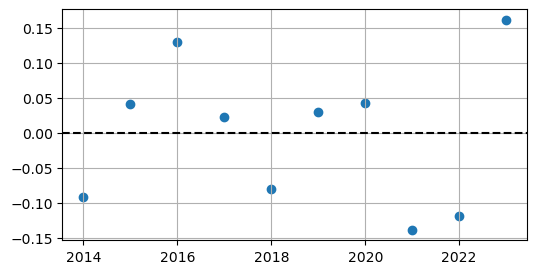

In [7]:
plt.figure(figsize=(6,3))
plt.scatter(temp_2014['Time'],
            temp_2014['adjusted anomaly']-prediction_2)

plt.axhline(color='k',linestyle='--')

plt.grid(True)



20-year warming rate (2004-2023): 0.2448996645864662
10-year warming rate (2014-2023): 0.19314274424242414
20-year warming rate (2003-2022): 0.20750911676691738
10-year warming rate (2013-2022): 0.15174267393939395


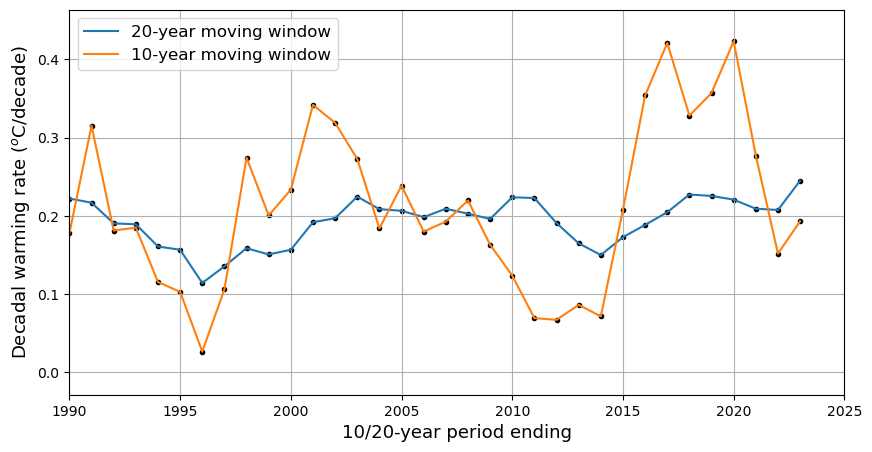

In [27]:
# running a regression loop to find the slopes
x = temp_yr_1970['Time'].values.reshape(-1,1)# convert the Pandas series object into Numpy array, reshape for sklearn
temp_1970 = temp_yr_1970['adjusted anomaly']

slopes = []
for i in range (len(x)-19): # exclude the first decade 
    model = LinearRegression().fit(x[i:i+20],temp_1970[i:i+20])
    slope = model.coef_[0]
    slopes.append(slope*10)
plt.figure(figsize=(10,5))
plt.plot(year_1970[19:],slopes,label='20-year moving window')
plt.scatter(year_1970[19:],slopes,marker='.',c='k')

slopes1 = []

for i in range (len(x)-9): # exclude the first decade 
    model1 = LinearRegression().fit(x[i:i+10],temp_1970[i:i+10])
    slope1 = model1.coef_[0]
    slopes1.append(slope1*10)
plt.plot(year_1970[9:],slopes1,label='10-year moving window')
plt.scatter(year_1970[9:],slopes1,marker='.',c='k')

plt.legend(fontsize=12)
plt.xlabel('10/20-year period ending',fontsize=13)
plt.ylabel('Decadal warming rate ($^o$C/decade)',fontsize=13)
plt.grid(True)
plt.xlim(1990,2025)

print('20-year warming rate (2004-2023):',slopes[-1])
print('10-year warming rate (2014-2023):',slopes1[-1])

print('20-year warming rate (2003-2022):',slopes[-2])
print('10-year warming rate (2013-2022):',slopes1[-2])

## 50-year warming rate

In [33]:
yr_73 = temp[(temp['Time']>=1973) & (temp['Time']<=2022)]
# best-fit line with regression from 1970
x = yr_73['Time'].values.reshape(-1,1)#reshape for sklearn
model = LinearRegression().fit(x,yr_73['adjusted anomaly'])
prediction = model.predict(x)
print('50-yr Decadal warming rate (1973-2022): ',model.coef_*10)



yr_74 = temp[(temp['Time']>=1974) & (temp['Time']<=2023)]
# best-fit line with regression from 1970
x = yr_74['Time'].values.reshape(-1,1)#reshape for sklearn
model = LinearRegression().fit(x,yr_74['adjusted anomaly'])
print('50-yr Decadal warming rate (1974-2023): ', model.coef_*10)

model1 = LinearRegression().fit(x,yr_74['adjusted Upper'])
print(f'50-yr Decadal warming rate (1974-2023), upper Slope: ',model1.coef_*10)

model2 = LinearRegression().fit(x,yr_74['adjusted Lower'])
print('50-yr Decadal warming rate (1974-2023), lower Slope: ',model2.coef_*10)


50-yr Decadal warming rate (1973-2022):  [0.19365856]
50-yr Decadal warming rate (1974-2023):  [0.20195044]
50-yr Decadal warming rate (1974-2023), upper Slope:  [0.2011919]
50-yr Decadal warming rate (1974-2023), lower Slope:  [0.20270898]


## Monthly anomalies


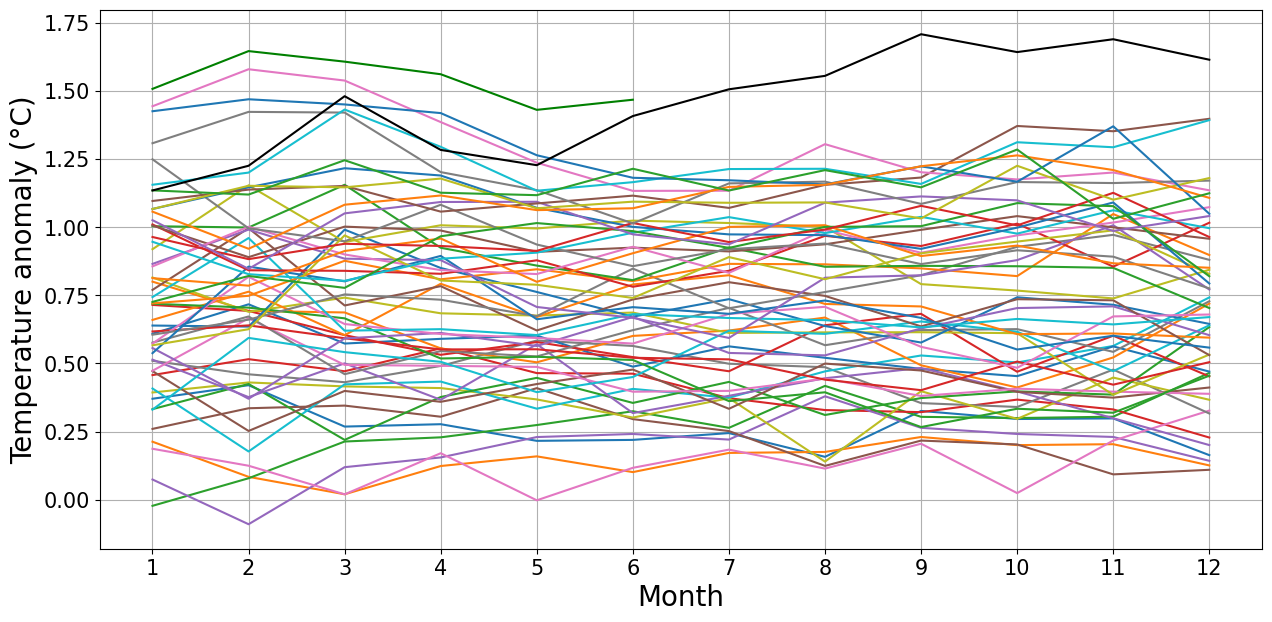

In [35]:
# read in the monthly temperature data
mon = pd.read_csv('HadCRUT.5.0.2.0.analysis.summary_series.global.monthly.csv')
mon['adjusted anomaly'] = mon['Anomaly (deg C)'] - temp_base['Anomaly (deg C)'].mean()

# convert the Time into datetime objects
mon['Time']=pd.to_datetime(mon['Time'],format='%Y-%m')

# extract Year & Month from "Time" column
mon['Year']=mon['Time'].dt.year
mon['Month']=mon['Time'].dt.month


# plotting
plt.figure(figsize=(15,7))

for year in range (1970,2023):
    year_data = mon[mon['Year']==year]
    plt.plot(year_data['Month'],year_data['adjusted anomaly'],
             label=str(year))

yr2023 = mon[mon['Year']==2023]
plt.plot(yr2023['Month'],yr2023['adjusted anomaly'],c='k',label='2023')

yr2024 = mon[mon['Year']==2024]
plt.plot(yr2024['Month'],yr2024['adjusted anomaly'],c='g',label='2024')


plt.xlabel('Month',fontsize=20)
plt.ylabel('Temperature anomaly (\N{DEGREE SIGN}C)',fontsize=20)
plt.xticks(range(1,13),fontsize=15)
plt.yticks(fontsize=15)
# plt.legend(loc='upper right',title='Years')
plt.grid(True)
